# BTC

In [1]:
%matplotlib notebook

import datetime
import os
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
yesterday = datetime.date.today() - datetime.timedelta(1)
db_filename = f'~/var/zanzibar/db/zanzibar-{yesterday:%Y%m%d}.db'

print(f'{db_filename =}')

connection = sqlite3.connect(os.path.expanduser(db_filename))

db_filename ='~/var/zanzibar/db/zanzibar-20211002.db'


In [3]:
# =====================#
# Only change 'market' #
# =====================#
market = 'BTC-EUR'

Fetch the data from the SQLite database and print an overview.

* Timestamp stores the local date/time (Europe/Amsterdam) in Unix epoch seconds (seconds since 1 january 1970 UTC). 

* Open is the openings price in EUR (€).

* High is the highest price in EUR (€)

* Low is the lowest price in EUR (€).

* Close is the closing price in EUR (€).

* Volume

In [4]:
btc = pd.read_sql_query(f'''
SELECT datetime(c.timestamp, 'unixepoch', 'localtime') as ts,
       c.open,
       c.high,
       c.low,
       c.close,
       c.volume
  FROM candles_1m c
  JOIN markets m
    ON m.id = c.market_id
   AND m.market = :market
''', connection, params={'market': market}, index_col='ts', parse_dates='{ts}: {%Y-%m-%d %H:%m:%s}')

btc

,open,high,low,close,volume
ts,,,,,
2021-09-28 20:15:00,35399.0,35400.0,35357.0,35357.0,0.135480
2021-09-28 20:16:00,35401.0,35442.0,35380.0,35425.0,0.760452
2021-09-28 20:17:00,35425.0,35433.0,35395.0,35399.0,0.191009
2021-09-28 20:18:00,35419.0,35467.0,35392.0,35417.0,0.151922
2021-09-28 20:19:00,35476.0,35496.0,35457.0,35490.0,0.038856
...,...,...,...,...,...
2021-10-02 18:51:00,41330.0,41374.0,41298.0,41373.0,0.049130
2021-10-02 18:52:00,41322.0,41389.0,41314.0,41365.0,1.379630
2021-10-02 18:53:00,41365.0,41384.0,41342.0,41384.0,0.145402


<IPython.core.display.Javascript object>


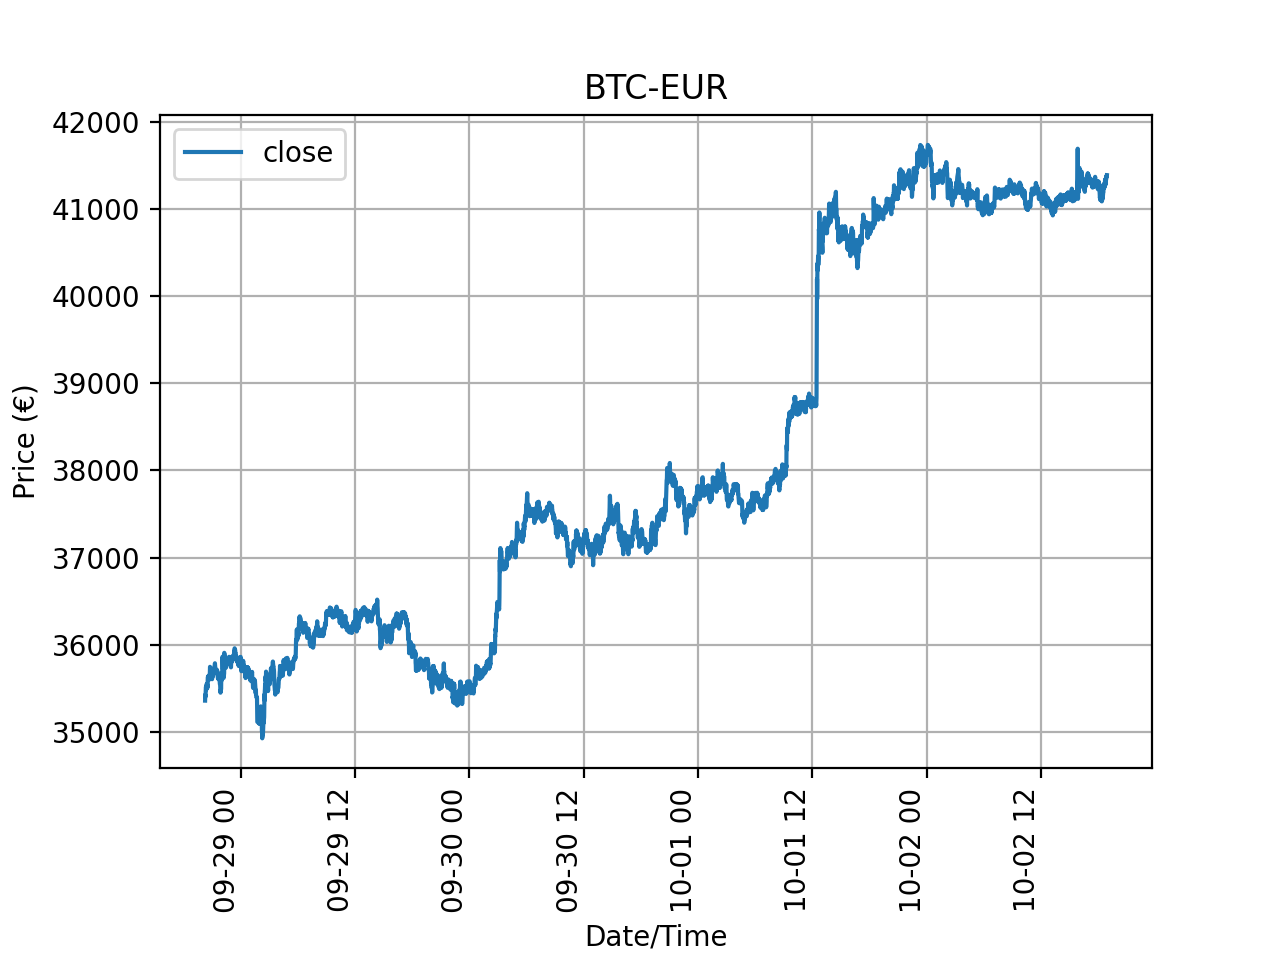

In [5]:
# btc['open'].plot(label='open')
# btc['high'].plot(label='high')
# btc['low'].plot(label='low')
btc['close'].plot(label='close')

plt.title(market)
plt.xlabel('Date/Time')
plt.ylabel('Price (€)')
plt.xticks(rotation=90)
plt.legend()
plt.grid()